In [27]:
# Title: Hierarchical Clustering Project in Python

# Importing the needed libraries
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [13]:
# Importing the dataset
dataset = pd.read_csv('Customers.csv')

dataset.head()

,CustomerID,Gender,Age,AnnualSalary(k$),Spendings(1-100)
0,157,Male,37,78,1
1,159,Male,34,78,1
2,201,Female,19,137,1
3,9,Male,64,19,3
4,202,Female,19,137,3


In [17]:
dataset.shape

(250, 5)

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        250 non-null    int64 
 1   Gender            250 non-null    object
 2   Age               250 non-null    int64 
 3   AnnualSalary(k$)  250 non-null    int64 
 4   Spendings(1-100)  250 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.9+ KB


In [16]:
dataset.describe()

,CustomerID,Age,AnnualSalary(k$),Spendings(1-100)
count,250.000000,250.000000,250.00000,250.000000
mean,125.500000,39.688000,61.23200,50.268000
std,72.312977,14.716554,28.37348,27.109553
min,1.000000,18.000000,15.00000,1.000000
25%,63.250000,28.000000,40.00000,31.250000
50%,125.500000,36.500000,61.50000,50.000000
75%,187.750000,50.000000,78.00000,73.000000
max,250.000000,70.000000,137.00000,99.000000


In [15]:
X = dataset.iloc[:, [3, 4]].values


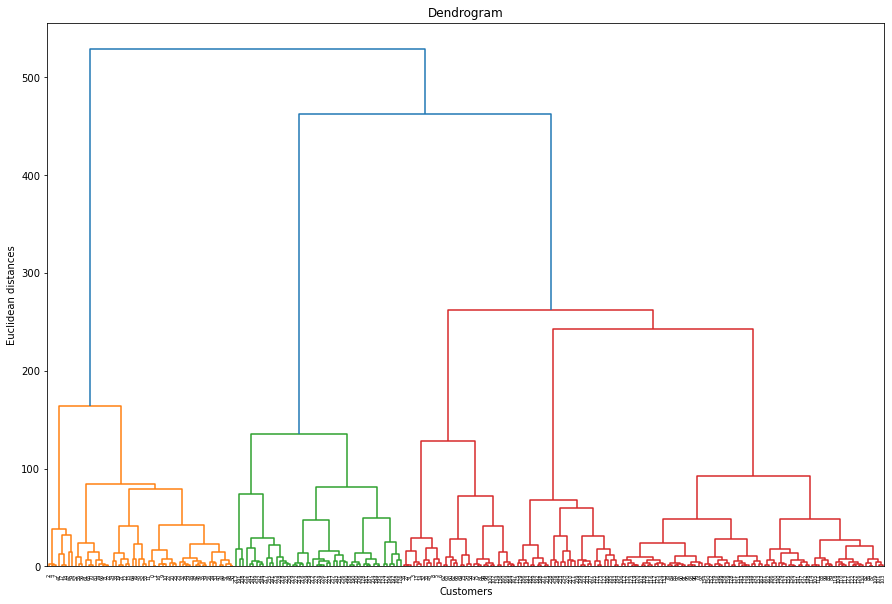

In [32]:
# Using the dendrogram to find optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
#ward is to minimize the variance of each cluster
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [9]:
# Fitting Hierarchical Clustering to our Data
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

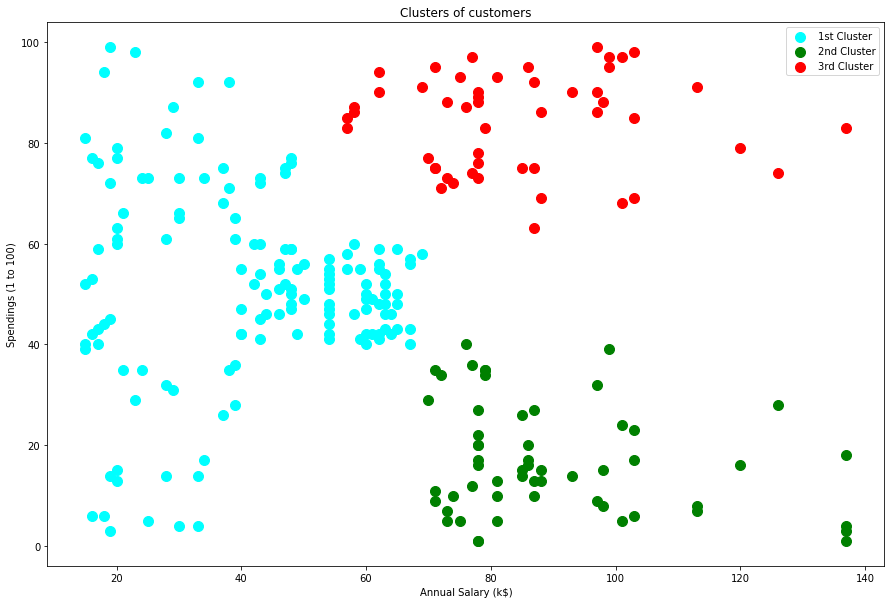

In [33]:
# Visualising the clusters and interpretation

plt.figure(figsize=(15, 10))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'cyan', label = '1st Cluster')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'green', label = '2nd Cluster')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'red', label = '3rd Cluster')
#plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'blue', label = '4th Cluster')

plt.title('Clusters of customers')
plt.xlabel('Annual Salary (k$)')
plt.ylabel('Spendings (1 to 100)')
plt.legend()
plt.show()